In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats
from sklearn import neighbors,preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

Data Preprocessing

In [103]:
#表格化resd_csv
train_data=pd.read_csv('./adult/adult.data',header=0,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
test_data=pd.read_csv('./adult/adult.test',header=0,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
#?換成NAN
train_data=train_data.replace(' ?',np.nan)
test_data=test_data.replace(' ?',np.nan)
#找'workclass','occupation','native-country'各自的眾數，NaN替換成眾數
train_data['workclass']=train_data['workclass'].fillna((train_data['workclass'].mode()[0]))
train_data['occupation']=train_data['occupation'].fillna((train_data['occupation'].mode()[0]))
train_data['native-country']=train_data['native-country'].fillna((train_data['native-country'].mode()[0]))
test_data['workclass']=test_data['workclass'].fillna((test_data['workclass'].mode()[0]))
test_data['occupation']=test_data['occupation'].fillna((test_data['occupation'].mode()[0]))
test_data['native-country']=test_data['native-country'].fillna((test_data['native-country'].mode()[0]))
#去除class裡的.跟空白鍵
# train_data=train_data.apply(lambda x: x.replace(' ', ''))
# test_data=test_data.apply(lambda x: x.replace(' ', ''))
# test_data['class'] = test_data['class'].apply(lambda x: x.replace('>50K.','>50K'))
# test_data['class'] = test_data['class'].apply(lambda x: x.replace('<=50K.','<=50K'))
# labelencoder = LabelEncoder()
# labelencoder.fit_transform(test_data['class'])
#刪除意思相近的欄位
train_data=train_data.drop(labels=['education-num'],axis='columns')
test_data=test_data.drop(labels=['education-num'],axis='columns')
#刪除較無意義的欄位
train_data=train_data.drop(labels=['fnlwgt'],axis='columns')
test_data=test_data.drop(labels=['fnlwgt'],axis='columns')
# #刪掉重複的資料
train_data=train_data.drop_duplicates() 
test_data=test_data.drop_duplicates() 
#one hot encoding
train_data=pd.get_dummies(train_data,columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class'],dtype=int)
test_data=pd.get_dummies(test_data,columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class'],dtype=int)
#test_data的feature缺少了'native-country_ Holand-Netherlands'這個欄位，將此欄位補上後，值填0，_並用get_loc找出位置排序好
test_data.insert(loc=76,column='native-country_ Holand-Netherlands',value=0)
#StandardScaler
train_data['age'] = (train_data['age']-train_data['age'].mean())/train_data['age'].std()
train_data['capital-gain'] = (train_data['capital-gain']-train_data['capital-gain'].mean())/train_data['capital-gain'].std()
train_data['capital-loss'] = (train_data['capital-loss']-train_data['capital-loss'].mean())/train_data['capital-loss'].std()
train_data['hours-per-week'] = (train_data['hours-per-week']-train_data['hours-per-week'].mean())/train_data['hours-per-week'].std()
test_data['age'] = (test_data['age']-test_data['age'].mean())/test_data['age'].std()
test_data['capital-gain'] = (test_data['capital-gain']-test_data['capital-gain'].mean())/test_data['capital-gain'].std()
test_data['capital-loss'] = (test_data['capital-loss']-test_data['capital-loss'].mean())/test_data['capital-loss'].std()
test_data['hours-per-week'] = (test_data['hours-per-week']-test_data['hours-per-week'].mean())/test_data['hours-per-week'].std()

In [113]:
# read dataframe
train_data = pd.read_csv('./adult/adult.data', header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data = pd.read_csv('./adult/adult.test', header= None, skiprows=1, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
originTest = test_data

print("Original data: Train", train_data.shape, ", Test", test_data.shape)

# drop duplicate value
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

print("After Dropping: Train", train_data.shape, ", Test", test_data.shape)
# education and education-num have same meaning
train_data.drop(['education'], axis = 1, inplace = True)
test_data.drop(['education'], axis = 1, inplace = True)

# fnlwgt is not important feature
train_data.drop(['fnlwgt'], axis = 1, inplace = True)
test_data.drop(['fnlwgt'], axis = 1, inplace = True)

# remove the space
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# replace the NAN into mode value
train_data['workclass'] = train_data['workclass'].replace("?", train_data['workclass'].mode()[0])
train_data['occupation'] = train_data['occupation'].replace("?",train_data['occupation'].mode()[0])
train_data['native-country'] = train_data['native-country'].replace("?",train_data['native-country'].mode()[0])


test_data['workclass'] = test_data['workclass'].replace("?", test_data['workclass'].mode()[0])
test_data['occupation'] = test_data['occupation'].replace("?",test_data['occupation'].mode()[0])
test_data['native-country'] = test_data['native-country'].replace("?",test_data['native-country'].mode()[0])

# Label Encoding
# tranfer the value of class(income) into int(1 or 0)
# >50K is 1, <=50K is 0
train_data['income'] = train_data['income'].apply(lambda x: 1 if x == ">50K" else 0)
test_data['income'] = test_data['income'].apply(lambda x: 1 if x == ">50K" else 0)

# One Hot Encoding (Dummies)
trainData_dum = pd.get_dummies(train_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)
testData_dum = pd.get_dummies(test_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)
pd.DataFrame(trainData_dum)

#在讀熱編碼後會依照有名目之欄位產生資料，train_data比test_data多出了該欄位，故將test_data新增該欄位，讓兩個資料集欄位相同。
testData_dum['native-country_Holand-Netherlands'] = 0

# Normalization(z-score)
numerical_columns = ['age','education-num','capital-gain','capital-loss']
scaler = preprocessing.StandardScaler()
trainData_dum[numerical_columns] = scaler.fit_transform(trainData_dum[numerical_columns])
testData_dum[numerical_columns] = scaler.transform(testData_dum[numerical_columns])


## replace "&" into "and" (for graph)
trainData_dum = trainData_dum.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})
testData_dum = testData_dum.rename(columns={'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago'})


Original data: Train (32561, 15) , Test (16281, 15)
After Dropping: Train (32537, 15) , Test (16276, 15)


KNN模型

In [104]:
#建立模型
train_X, test_X, train_y, test_y = train_data.drop(columns=['hours-per-week'],axis=1), test_data.drop(columns=['hours-per-week'],axis=1), train_data['hours-per-week'], test_data['hours-per-week']
# neigh = KNeighborsRegressor(n_neighbors=5)
# neigh.fit(train_X.values, train_y) #Here x.values will have only values without headers
# pred_y=neigh.predict(test_X.values)

### KNN績效(RMSE，MAE、R-Squared)

In [127]:
train_data_score=[]
R2=[]
RMSE=[]
MAPE=[]
for i in range(25,50,5):
    print("neighbors numbers:",i)
    neigh = KNeighborsRegressor(n_neighbors=i,leaf_size=35,n_jobs=-1)
    neigh.fit(train_X.values, train_y) #Here x.values will have only values without headers
    pred_y=neigh.predict(test_X.values)

    train_data_score_data=neigh.score(train_X.values, train_y)
    train_data_score.append(train_data_score_data)
    R2_data=r2_score(test_y, pred_y)
    R2.append(R2_data)
    RMSE_data=np.sqrt(mean_absolute_error(test_y,pred_y))
    RMSE.append(RMSE_data)
    MAPE_data=mean_absolute_percentage_error(test_y,pred_y)
    MAPE.append(MAPE_data)

    print(f"train_data score:{train_data_score_data:.3f}")
    print(f"R2:{R2_data:.5f}")
    print(f"RMSE:{RMSE_data:.5f}")
    print(f"MAPE:{MAPE_data:.5f}%")
    print('------------------------------------------------------')

# left,right = plt.ylim()
# bottom,top= plt.ylim()

neighbors numbers: 25


train_data score:0.286
R2:0.24137
RMSE:0.77718
MAPE:4.19292%
------------------------------------------------------
neighbors numbers: 30


Top value:0.264, Bottom value:0.251


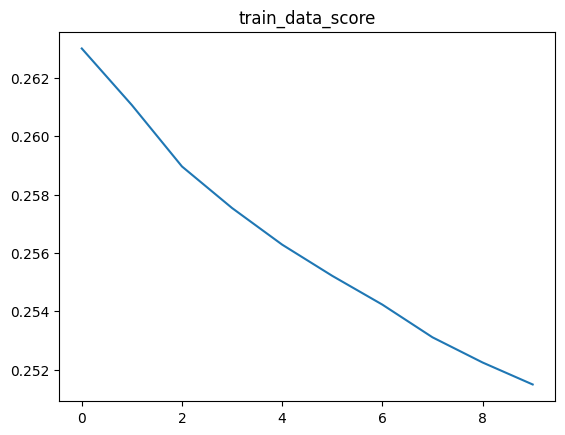

Top value:0.247, Bottom value:0.246


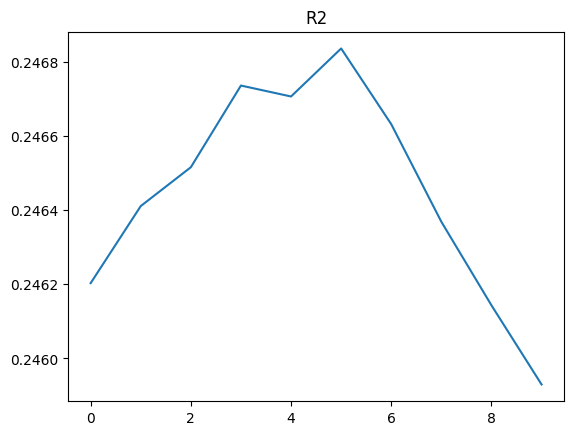

Top value:0.775, Bottom value:0.774


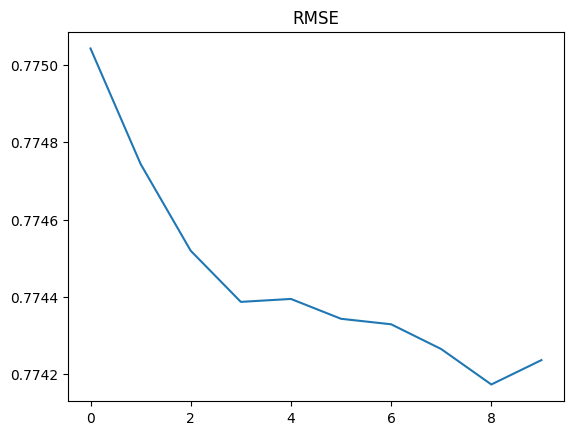

Top value:4.096, Bottom value:3.975


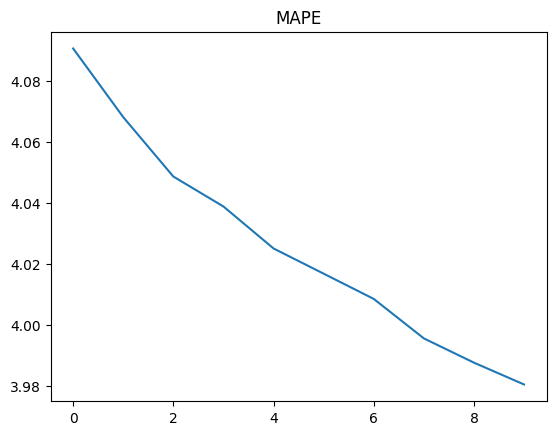

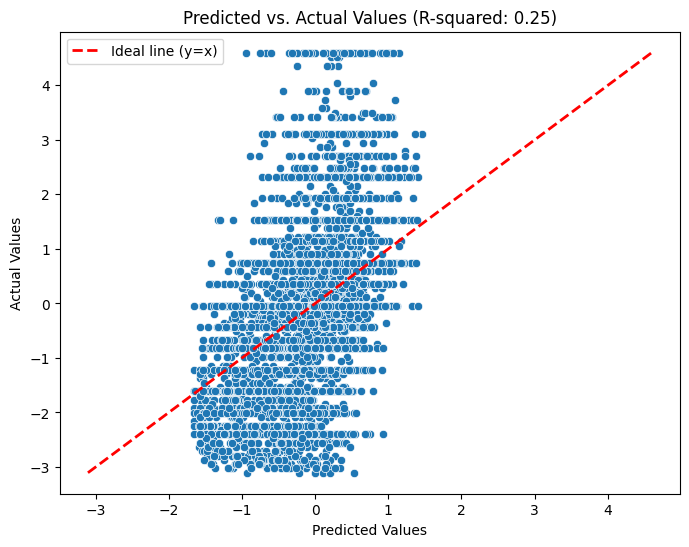

In [126]:
#plot
plt.plot(train_data_score)
bottom,top= plt.ylim()
print(f"Top value:{top:.3f}, Bottom value:{bottom:.3f}")
plt.title('train_data_score')
plt.show()

plt.plot(R2)
bottom,top= plt.ylim()
print(f"Top value:{top:.3f}, Bottom value:{bottom:.3f}")
plt.title('R2')
plt.show()

plt.plot(RMSE)
bottom,top= plt.ylim()
print(f"Top value:{top:.3f}, Bottom value:{bottom:.3f}")
plt.title('RMSE')
plt.show()

plt.plot(MAPE)
bottom,top= plt.ylim()
print(f"Top value:{top:.3f}, Bottom value:{bottom:.3f}")
plt.title('MAPE')
plt.show()

#plot_scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pred_y, y=test_y)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red', linewidth=2, label='Ideal line (y=x)')
plt.title(f'Predicted vs. Actual Values (R-squared: {r2_score(test_y,pred_y):.2f})')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

In [107]:
def measures(y1,y2):
    corr_val = np.corrcoef(y1,y2)[0,1]
    r_squared = corr_val**2
    return corr_val, r_squared
def plot_reg(x,y,pred):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(x, y,color='r', alpha=.4) # actual data
    ax.plot(x, pred ,color='k') # regression line
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()